## Building a Convolutional Neural Network (CNN) to recognize handwritten digits classified between 0-9.

In [0]:
## Import statements needed in the code
import tensorflow as tf
import keras
from keras.datasets import mnist 
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [0]:
## Load, normalize, and reshape image data

mnist = tf.contrib.learn.datasets.load_dataset("mnist")
 
train_X = mnist.train.images.reshape(mnist.train.images.shape[0], 28, 28, 1)
train_Y = np.asarray(mnist.train.labels, dtype=np.int32)
test_X = mnist.test.images.reshape(mnist.test.images.shape[0], 28, 28, 1)
test_Y = np.asarray(mnist.test.labels, dtype=np.int32)

In [0]:
## Build the model (CNN)

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (train_X.shape[1],train_X.shape[2],1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(2,2),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(2,2),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
## Compile and optimize the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
## Train the model

model.fit(train_X, train_Y, batch_size= 100, epochs=4, validation_data=(test_X, test_Y))

## Now we save the weights to our previously trained model so that we can use this
## model whenever we want without needing to retrain the model.

model.save_weights('CNN_model')

Train on 55000 samples, validate on 10000 samples
Epoch 1/4
55000/55000 [==============================] - 43s 773us/sample - loss: 0.2267 - acc: 0.9319 - val_loss: 0.0554 - val_acc: 0.9824
Epoch 2/4
55000/55000 [==============================] - 42s 759us/sample - loss: 0.0568 - acc: 0.9821 - val_loss: 0.0440 - val_acc: 0.9854
Epoch 3/4
55000/55000 [==============================] - 38s 697us/sample - loss: 0.0407 - acc: 0.9865 - val_loss: 0.0373 - val_acc: 0.9873
Epoch 4/4
55000/55000 [==============================] - 39s 708us/sample - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0283 - val_acc: 0.9903


In [0]:
## Load our model weights and predict some unseen instances

model.load_weights('CNN_model')

predictions = model.predict(test_X)

predictions = np.argmax(predictions,axis=1)

print("Model's digit preditions: ", predictions[:10])

print("Actual digits: ", test_Y[:10])

## As we can see our model is working quite well. Accuracy of 99.01%

Model's digit preditions:  [7 2 1 0 4 1 4 9 5 9]
Actual digits:  [7 2 1 0 4 1 4 9 5 9]


Text(0.5, 1.0, 'Predicted: 2, Actual: 8')

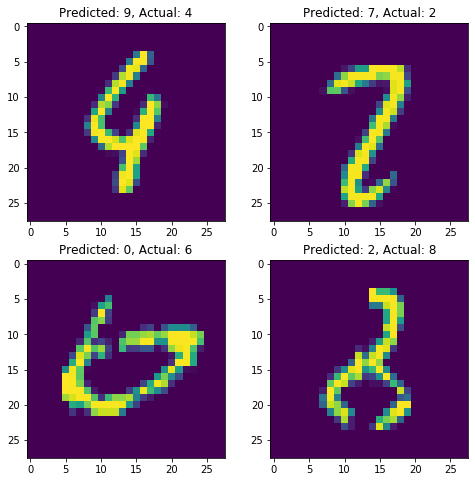

In [0]:
## Let's visualize some of the examples that were incorrectly predicted by our model

fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(test_X[115].reshape(28,28))
a.set_title("Predicted: 9, Actual: 4")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(test_X[321].reshape(28,28))
a.set_title("Predicted: 7, Actual: 2")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(test_X[445].reshape(28,28))
a.set_title("Predicted: 0, Actual: 6")
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(test_X[582].reshape(28,28))
a.set_title("Predicted: 2, Actual: 8")

## These examples were quite difficult. Even a human could have possibly incorrectly 
## classified these numbers. So it is understandable that our model did as well.